# Robustness of Graph Neural Networks at Scale - Quick Start

This notebook can be run in google colab and serves as a quick introduction to the [Robustness of Graph Neural Networks at Scale](https://github.com/sigeisler/robustness_of_gnns_at_scale) repository.

## 0. Setup

First, let's get the code and install requirements.


In [30]:
import config
%cd {config.PROJECT_DIR}

C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main


C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


### Imports

In [2]:
# run
import seml

In [31]:
#7 run
#%cd robustness_of_gnns_at_scale
from matplotlib import pyplot as plt

from experiments import (
    experiment_train,
    experiment_local_attack_direct,
    experiment_global_attack_direct
)

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Training

For the training and evaluation code we decided to provide Sacred experiments which make it very easy to run the same code from the command line or on your cluster. To train or attack the models you can use the `script_execute_experiment` script and simply specify the respective configuration or execute the experiment directly by passing the desired configuration in [experiments/experiment_train.py](https://github.com/sigeisler/robustness_of_gnns_at_scale/blob/main/experiments/experiment_train.py#L74).

In the example below, we train a `GCN` on `Cora ML`.

[04/08/25 14:32:58] INFO     {'dataset': 'cora_ml', 'model_params': {'label': 'Vanilla      ]8;id=569967;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=522799;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py#140\140]8;;\
                             GCN', 'model': 'GCN', 'do_cache_adj_prep': True, 'n_filters':                         
                             64, 'dropout': 0.5, 'svd_params': None, 'jaccard_params':                             
                             None, 'gdc_params': {'alpha': 0.15, 'k': 64}}, 'train_params':                        
                             {'lr': 0.01, 'weight_decay': 0.001, 'patience': 300,                                  
                             'max_epochs': 3000}, 'binary_attr': False, 'make_undirected':                         
                             True, 'seed': 0, 'artifact_dir': 'cache',                                             
                             'model_storage_type': 'demo', 'ppr_cache_params': {},                                 
                             'device': 'cpu', 'display_steps': 100, 'data_device': 'cpu'}                          

                    INFO     Training set size: 140                                         ]8;id=224222;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=37646;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py#161\161]8;;\

                    INFO     Validation set size: 140                                       ]8;id=810108;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=739555;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py#162\162]8;;\

                    INFO     Test set size: 2530                                            ]8;id=127300;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=650228;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py#163\163]8;;\

                    INFO     Memory Usage after loading the dataset:                        ]8;id=78848;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=651761;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py#183\183]8;;\

                    INFO     nan                                                            ]8;id=306566;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=352493;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py#184\184]8;;\

[04/08/25 14:32:59] INFO                                                                                ]8;id=941409;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py\train.py]8;;\:]8;id=606125;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch    0: loss_train: 1.94657, loss_val: 1.94479, acc_train: 0.10000,               
                             acc_val: 0.18571                                                                      

[04/08/25 14:33:05] INFO                                                                                ]8;id=500284;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py\train.py]8;;\:]8;id=866696;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  100: loss_train: 0.09288, loss_val: 0.42195, acc_train: 1.00000,               
                             acc_val: 0.88571                                                                      

[04/08/25 14:33:14] INFO                                                                                ]8;id=509173;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py\train.py]8;;\:]8;id=69082;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  200: loss_train: 0.07167, loss_val: 0.37600, acc_train: 1.00000,               
                             acc_val: 0.90714                                                                      

[04/08/25 14:33:20] INFO                                                                                ]8;id=119775;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py\train.py]8;;\:]8;id=29109;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  300: loss_train: 0.07151, loss_val: 0.39939, acc_train: 1.00000,               
                             acc_val: 0.88571                                                                      

[04/08/25 14:33:26] INFO                                                                                ]8;id=969053;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py\train.py]8;;\:]8;id=233859;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  400: loss_train: 0.06845, loss_val: 0.38217, acc_train: 1.00000,               
                             acc_val: 0.90714                                                                      

[04/08/25 14:33:32] INFO                                                                                ]8;id=409575;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py\train.py]8;;\:]8;id=937209;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  500: loss_train: 0.06988, loss_val: 0.36415, acc_train: 1.00000,               
                             acc_val: 0.89286                                                                      

[04/08/25 14:33:36] INFO                                                                                ]8;id=941650;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py\train.py]8;;\:]8;id=322764;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  600: loss_train: 0.06436, loss_val: 0.40361, acc_train: 1.00000,               
                             acc_val: 0.87857                                                                      

[04/08/25 14:33:40] INFO     Test accuracy is 0.834782600402832 with seed 0                 ]8;id=90968;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=742188;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py#216\216]8;;\

                    INFO     Lock 2191659245776 acquired on cache\demo.json.lock                    ]8;id=324729;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=808658;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2191659245776 released on cache\demo.json.lock                    ]8;id=389709;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=707790;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

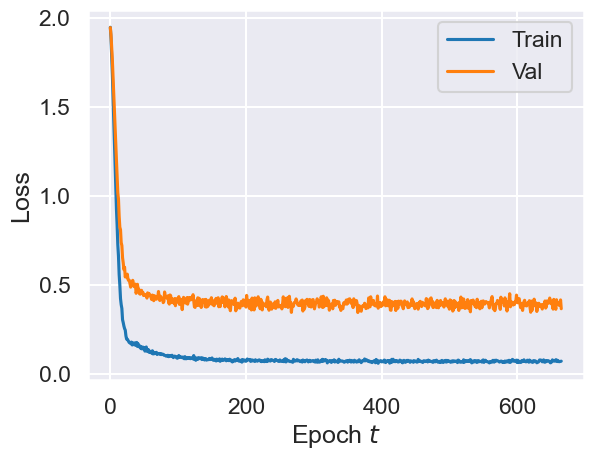

In [32]:
train_statistics = experiment_train.run(
    data_dir = './data',
    dataset = 'cora_ml',
    model_params = dict(
        label="Vanilla GCN",
        model="GCN",
        do_cache_adj_prep=True,
        n_filters=64,
        dropout=0.5,
        svd_params=None,
        jaccard_params=None,
        gdc_params={"alpha": 0.15, "k": 64}),
    train_params = dict(
        lr=1e-2,
        weight_decay=1e-3,
        patience=300,
        max_epochs=3000),
    binary_attr = False,
    make_undirected = True,
    seed=0,
    artifact_dir = 'cache',
    model_storage_type = 'demo',
    ppr_cache_params = dict(),
    #device = 0,
    #data_device = 0,
    device = "cpu",
    data_device = "cpu",
    display_steps = 100,
    debug_level = "info"
)

# plot train and val loss curves
fig, ax = plt.subplots()

color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
ax.set_xlabel('Epoch $t$')
ax.set_ylabel("Loss")
ax.plot(train_statistics['trace_train'], color=color, label='Train')

color = plt.rcParams['axes.prop_cycle'].by_key()['color'][1]
ax.plot(train_statistics['trace_val'], color=color, label='Val')
ax.legend()

plt.show()

In [33]:
clean_acc = train_statistics["accuracy"]
print(f'Accuracy of the model: {100*clean_acc:.2f}%')

Accuracy of the model: 83.48%


## 1.1 Certificate integration

In [34]:
#TODO
'''We need the following variables:
chosen model: GCN(
                    (conv1): SparseGCNConv(2879, 64)
                    (conv2): GCNConv(64, 7)
)
graph: for 
    edge_idx
    attr_idx
    n
    d
    nc
a dict containing:
    conv1.bias 
    conv2.bias
    conv1.lin.weight
    conv2.lin.weight

'''
 

'We need the following variables:\nchosen model: GCN(\n                    (conv1): SparseGCNConv(2879, 64)\n                    (conv2): GCNConv(64, 7)\n)\ngraph: for \n    edge_idx\n    attr_idx\n    n\n    d\n    nc\na dict containing:\n    conv1.bias \n    conv2.bias\n    conv1.lin.weight\n    conv2.lin.weight\n\n'

In [35]:
# certificate integration
import torch
import numpy as np
import copy
from sparse_smoothing.models import GCN
from sparse_smoothing.utils import load_and_standardize

loaded_from_robustness = torch.load(f'cache/demo/demo_1.pt', map_location='cpu', weights_only=False)

trained_state_dict = copy.deepcopy(loaded_from_robustness)

for key in list(trained_state_dict.keys()):
    if 'layers.0.' in key:
        new_key = key.replace('layers.0.gcn_0', 'conv1')
        trained_state_dict[new_key] = trained_state_dict.pop(key)  # Transpose if necessary

for key in list(trained_state_dict.keys()):
    if 'layers.1.' in key:
        new_key = key.replace('layers.1.gcn_1', 'conv2')
        trained_state_dict[new_key] = trained_state_dict.pop(key)  # Transpose if necessary

In [36]:
graph = load_and_standardize('data/cora_ml.npz')
n, d = graph.attr_matrix.shape
nc = graph.labels.max() + 1
pf_plus_att = 0.01
pf_minus_att = 0.6

In [37]:
model = GCN(n_features=d, n_classes=nc, n_hidden=64)#.cuda()
# Load the modified state dictionary
model.load_state_dict(trained_state_dict)

<All keys matched successfully>

In [38]:
print(model)
print(model.conv1.lin.weight)
print(model.conv2)



GCN(
  (conv1): SparseGCNConv(2879, 64)
  (conv2): GCNConv(64, 7)
)
Parameter containing:
tensor([[-0.0023, -0.0189, -0.0035,  ..., -0.0007, -0.0108, -0.0372],
        [-0.0070, -0.0108,  0.0022,  ..., -0.0066,  0.0141, -0.0339],
        [-0.0054, -0.0265, -0.0035,  ..., -0.0038, -0.0105, -0.0156],
        ...,
        [-0.0097, -0.0432,  0.0009,  ..., -0.0076, -0.0051, -0.0220],
        [ 0.0114,  0.0189,  0.0013,  ...,  0.0031,  0.0030, -0.0291],
        [ 0.0093, -0.0134, -0.0022,  ...,  0.0038,  0.0085,  0.0331]],
       requires_grad=True)
GCNConv(64, 7)


In [39]:
edge_idx = torch.LongTensor(np.stack(graph.adj_matrix.nonzero()))#.cuda()
attr_idx = torch.LongTensor(np.stack(graph.attr_matrix.nonzero()))#.cuda()

In [40]:
from sparse_smoothing.prediction import predict_smooth_gnn
#n_samples_eval = 100_000
#n_samples_eval = 10_000
n_samples_eval = 100

sample_config = {
    'n_samples': n_samples_eval,
    'pf_plus_adj': 0,
    'pf_minus_adj': 0,
    'pf_plus_att': 0.01,
    'pf_minus_att': 0.6,
}
batch_size = 50

sample_config_pre_eval = sample_config.copy()
sample_config_pre_eval['n_samples'] = 1_000


import torch


# we a small number of samples to estimate the majority class
pre_votes = predict_smooth_gnn(attr_idx=attr_idx, edge_idx=edge_idx,
                               sample_config=sample_config_pre_eval,
                               model=model, n=n, d=d, nc=nc,
                               batch_size=batch_size)

# we use a larger number of samples to estimate a lower bound
# on the probability of observing the majority class
votes = predict_smooth_gnn(attr_idx=attr_idx, edge_idx=edge_idx,
                           sample_config=sample_config,
                           model=model, n=n, d=d, nc=nc,
                           batch_size=batch_size)

print(votes)


[[ 99   0   0 ...   0   0   1]
 [  0 100   0 ...   0   0   0]
 [  0  99   0 ...   0   1   0]
 ...
 [ 77   0   0 ...  16   6   1]
 [  0   0   0 ...   0   0 100]
 [  3  25   0 ...   9   0  59]]


In [41]:
from sparse_smoothing.cert import p_lower_from_votes, binary_certificate_grid


conf_alpha = 0.01

# compute the lower bound on the probability of the majority class
p_lower = p_lower_from_votes(votes=votes, pre_votes=pre_votes, alpha=conf_alpha, n_samples=n_samples_eval)

# compute the binary-class certificate 2D grid (for all pairs of ra and rd radii)
# where grid_binary_class > 0.5 means the instance is robust
grid_binary_class, *_ = binary_certificate_grid(pf_plus=pf_plus_att, pf_minus=pf_minus_att,
                                            p_emps=p_lower, reverse=False, progress_bar=True)


max_ra=1, max_rd=4, min_p_emp=0.6970


In [42]:
grid_radii = (grid_binary_class>0.5)

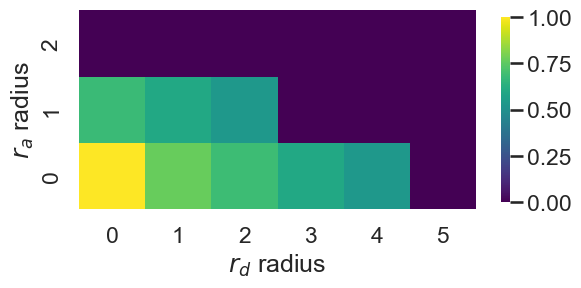

In [43]:
import seaborn as sns

heatmap = (grid_binary_class>0.5).mean(0)
sns.set_context('talk')
sns.heatmap(heatmap,
            cmap='viridis',
            vmin=0, vmax=1, square=True, cbar_kws={"shrink": .5})
plt.xlim(0, heatmap.shape[1])
plt.ylim(0, heatmap.shape[0])
plt.xlabel('$r_d$ radius')
plt.ylabel('$r_a$ radius')
plt.show()

In [44]:
from sparse_smoothing.cert import regions_discrete, compute_rho_for_many
# if pf_plus = pf_minus any combination of ra+rd+rc=r gives the same result.
pf_plus = pf_minus = 0.8
ra = 1
rd = 0
rc = 0

n_discrete_categories = 2

regions = regions_discrete(ra=ra, rd=rd, rc=rc, k=n_discrete_categories, pf_plus=pf_plus, pf_minus=pf_minus)

percent_robust = (compute_rho_for_many(regions=regions, p_emps=p_lower)>0.5).mean() * 100

print(f'At radius r={ra+rd+rc}, {percent_robust} percent of nodes are certifiably robust')

At radius r=1, 61.957295373665474 percent of nodes are certifiably robust


In [45]:
grid_radii_one_deletion_false = grid_radii[:,0,1]

## 2. Evaluation

For evaluation, we use the locally stored models. Similarly to training, we provide a script that runs the attacks for different seeds for all pretrained models. For all experiments, please check out the [config](https://github.com/sigeisler/robustness_of_gnns_at_scale/tree/main/config) folder.

### 2.1 Local PR-BCD Attack with grid_radii initialization
We provide an example for a `local PR-BCD` attack on the `Vanilla GCN` model trained previously by passing the desired configuration in [experiments/experiment_local_attack_direct.py](https://github.com/sigeisler/robustness_of_gnns_at_scale/blob/main/experiments/experiment_local_attack_direct.py#L68).

In [18]:
local_prbcd_statistics_cert = experiment_local_attack_direct.run(
    data_dir = './data',
    dataset = 'cora_ml',
    attack = 'LocalPRBCD',
    attack_params = dict(
        ppr_cache_params = dict(
            data_artifact_dir = 'cache',
            data_storage_type = 'ppr'),
        #epochs = 500, # -> way too high for my setup, use 40-100
        epochs = 50,
        fine_tune_epochs = 100,
        search_space_size = 100,
        block_size = 100,
        ppr_recalc_at_end = True,
        loss_type = 'Margin',
        lr_factor = 0.05),
    nodes = None,
    nodes_topk = 5,
    seed=0,
    epsilons = [1],
    min_node_degree = None,
    binary_attr = False,
    make_undirected = True,
    artifact_dir = 'cache',
    model_label = 'Vanilla GCN',
    model_storage_type = 'demo',
    #device = 0,
    #data_device = 0,
    device = "cpu",
    data_device = "cpu",
    debug_level = "info",
    grid_radii=grid_radii,
    use_cert=True,
)

[04/01/25 12:56:27] INFO     {'dataset': 'cora_ml', 'attack': 'LocalPRBCD', 'attack_params':           ]8;id=731199;file://E:\Masterarbeit\ProjectCombined\experiments\common.py\common.py]8;;\:]8;id=199490;file://E:\Masterarbeit\ProjectCombined\experiments\common.py#38\38]8;;\
                             {'ppr_cache_params': {'data_artifact_dir': 'cache', 'data_storage_type':              
                             'ppr'}, 'epochs': 50, 'fine_tune_epochs': 100, 'search_space_size': 100,              
                             'block_size': 100, 'ppr_recalc_at_end': True, 'loss_type': 'Margin',                  
                             'lr_factor': 0.05}, 'epsilons': [1], 'make_undirected': True,                         
                             'binary_attr': False, 'seed': 0, 'artifact_dir': 'cache',                             
                             'pert_adj_storage_type': None, 'pert_attr_storage_type': None,                        
                             'model_label': 'Vanilla GCN', 'model_storage_type': 'demo', 'device':                 
                             'cpu', 'data_device': 'cpu'}                                                          

                    INFO     Lock 2073803943632 acquired on cache\demo.json.lock                    ]8;id=921831;file://E:\Anaconda\envs\Masterarbeit\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=778192;file://E:\Anaconda\envs\Masterarbeit\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2073803943632 released on cache\demo.json.lock                    ]8;id=559971;file://E:\Anaconda\envs\Masterarbeit\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=436419;file://E:\Anaconda\envs\Masterarbeit\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Found 1 models with label 'Vanilla GCN' to       ]8;id=91936;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=504688;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py#141\141]8;;\
                             attack.                                                                               

                    INFO     Sample Attack Nodes for model with accuracy 0.8352                       ]8;id=884401;file://E:\Masterarbeit\ProjectCombined\experiments\common.py\common.py]8;;\:]8;id=852062;file://E:\Masterarbeit\ProjectCombined\experiments\common.py#166\166]8;;\

[04/01/25 12:56:28] INFO     Found 2530 suitable '1+ degree' nodes out of 2530 candidate nodes to be  ]8;id=23872;file://E:\Masterarbeit\ProjectCombined\experiments\common.py\common.py]8;;\:]8;id=300441;file://E:\Masterarbeit\ProjectCombined\experiments\common.py#132\132]8;;\
                             sampled from for the attack of which 2113 have the correct class label                

                    INFO     Sample the following attack nodes:                                       ]8;id=159453;file://E:\Masterarbeit\ProjectCombined\experiments\common.py\common.py]8;;\:]8;id=180615;file://E:\Masterarbeit\ProjectCombined\experiments\common.py#171\171]8;;\
                             [475]                                                                                 
                             [2105]                                                                                
                             [1707  834]                                                                           

                    INFO     Original: Loss: -9.881260871887207 Statstics: {'logit_target':       ]8;id=509150;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=62652;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#79\79]8;;\
                             -0.0002615109842736274, 'logit_best_non_target': -9.881522178649902,                  
                             'confidence_target': np.float64(0.9997385232067433),                                  
                             'confidence_non_target': np.float64(5.1110419437683184e-05),                          
                             'margin': np.float64(0.9996874127873056)}                                             
                                                                                                                   

  0%|          | 0/50 [00:00<?, ?it/s]

                    INFO     Initial: Loss: -9.881260871887207 Statstics: {'logit_target':        ]8;id=632689;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=416137;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#97\97]8;;\
                             -0.0002615109842736274, 'logit_best_non_target': -9.881522178649902,                  
                             'confidence_target': np.float64(0.9997385232067433),                                  
                             'confidence_non_target': np.float64(5.1110419437683184e-05),                          
                             'margin': np.float64(0.9996874127873056)}                                             
                                                                                                                   

[04/01/25 12:56:29] INFO                                                                         ]8;id=742046;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=92948;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#118\118]8;;\
                             Epoch: 0 Loss: -9.881260871887207 Statstics: {'logit_target':                         
                             -0.0002615109842736274, 'logit_best_non_target':                                      
                             -9.881522178649902, 'confidence_target':                                              
                             np.float64(0.9997385232067433), 'confidence_non_target':                              
                             np.float64(5.1110419437683184e-05), 'margin':                                         
                             np.float64(0.9996874127873056)}                                                       
                                                                                                                   

                    INFO     Gradient mean 0.430370032787323 std 0.4110572040081024 with base    ]8;id=581499;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=44410;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#119\119]8;;\
                             learning rate 0.5300943312279429                                                      

 40%|████      | 20/50 [00:14<00:20,  1.45it/s]

[04/01/25 12:56:43] INFO                                                                         ]8;id=415982;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=554377;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#118\118]8;;\
                             Epoch: 20 Loss: -9.881260871887207 Statstics: {'logit_target':                        
                             -0.0002615109842736274, 'logit_best_non_target':                                      
                             -9.881522178649902, 'confidence_target':                                              
                             np.float64(0.9997385232067433), 'confidence_non_target':                              
                             np.float64(5.1110419437683184e-05), 'margin':                                         
                             np.float64(0.9996874127873056)}                                                       
                                                                                                                   

                    INFO     Gradient mean 0.430370032787323 std 0.4110572040081024 with base    ]8;id=770579;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=77259;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#119\119]8;;\
                             learning rate 0.5300943312279429                                                      

 80%|████████  | 40/50 [00:27<00:06,  1.47it/s]

[04/01/25 12:56:56] INFO                                                                         ]8;id=960859;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=759786;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#118\118]8;;\
                             Epoch: 40 Loss: -9.881260871887207 Statstics: {'logit_target':                        
                             -0.0002615109842736274, 'logit_best_non_target':                                      
                             -9.881522178649902, 'confidence_target':                                              
                             np.float64(0.9997385232067433), 'confidence_non_target':                              
                             np.float64(5.1110419437683184e-05), 'margin':                                         
                             np.float64(0.9996874127873056)}                                                       
                                                                                                                   

                    INFO     Gradient mean 0.430370032787323 std 0.4110572040081024 with base    ]8;id=164191;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=688831;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#119\119]8;;\
                             learning rate 0.5300943312279429                                                      

100%|██████████| 50/50 [00:34<00:00,  1.43it/s]


[04/01/25 12:57:03] INFO     Evaluated model Vanilla GCN using LocalPRBCD     ]8;id=252143;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=402697;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py#194\194]8;;\
                             with pert. edges for node 475 and budget 2:                                           

                    INFO     {'label': 'Vanilla GCN', 'epsilon': 1,           ]8;id=658840;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=950634;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py#215\215]8;;\
                             'n_perturbations': 2, 'degree': 2, 'logits':                                          
                             [[-1.3916124105453491, -1.4649813175201416,                                           
                             3.196052312850952, 0.07975733280181885,                                               
                             0.2694832980632782, -1.5252845287322998,                                              
                             0.6296548843383789]], 'initial_logits':                                               
                             [[-1.2917386293411255, -2.2045154571533203,                                           
                             8.618408203125, -1.396083116531372,                                                   
                             -1.2628530263900757, -1.275286078453064,                                              
                             -1.3779186010360718]], 'larget': 2, 'node_id':                                        
                             475, 'perturbed_edges': [[475, 475], [12, 60]],                                       
                             'logit_target': -0.1850261688232422,                                                  
                             'logit_best_non_target': -2.7514235973358154,                                         
                             'confidence_target':                                                                  
                             np.float64(0.8310825351155964),                                                       
                             'confidence_non_target':                                                              
                             np.float64(0.06383691842212119), 'margin':                                            
                             np.float64(0.7672456166934751),                                                       
                             'initial_logit_target': -0.0002615109842736274,                                       
                             'initial_logit_best_non_target':                                                      
                             -9.881522178649902, 'initial_confidence_target':                                      
                             np.float64(0.9997385232067433),                                                       
                             'initial_confidence_non_target':                                                      
                             np.float64(5.1110419437683184e-05),                                                   
                             'initial_margin':                                                                     
                             np.float64(0.9996874127873056)}                                                       

                    INFO     Completed attack and evaluation of Vanilla GCN   ]8;id=497086;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=355753;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py#216\216]8;;\
                             using LocalPRBCD with pert. edges for node 475                                        
                             and budget 2                                                                          

[04/01/25 12:57:04] INFO     Original: Loss: -0.25007206201553345 Statstics: {'logit_target':     ]8;id=694154;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=352472;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#79\79]8;;\
                             -1.458761215209961, 'logit_best_non_target': -1.7088332176208496,                     
                             'confidence_target': np.float64(0.23252414376166514),                                 
                             'confidence_non_target': np.float64(0.18107694679847275), 'margin':                   
                             np.float64(0.05144719696319239)}                                                      
                                                                                                                   

  0%|          | 0/50 [00:00<?, ?it/s]

                    INFO     Initial: Loss: -0.25007206201553345 Statstics: {'logit_target':      ]8;id=47098;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=874942;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#97\97]8;;\
                             -1.458761215209961, 'logit_best_non_target': -1.7088332176208496,                     
                             'confidence_target': np.float64(0.23252414376166514),                                 
                             'confidence_non_target': np.float64(0.18107694679847275), 'margin':                   
                             np.float64(0.05144719696319239)}                                                      
                                                                                                                   

[04/01/25 12:57:05] INFO                                                                         ]8;id=980805;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=674789;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#118\118]8;;\
                             Epoch: 0 Loss: -0.25007206201553345 Statstics: {'logit_target':                       
                             -1.4618462324142456, 'logit_best_non_target': -1.7193727493286133,                    
                             'confidence_target': np.float64(0.2318079081454023),                                  
                             'confidence_non_target': np.float64(0.17917850250655717), 'margin':                   
                             np.float64(0.052629405638845134)}                                                     
                                                                                                                   

                    INFO     Gradient mean 0.008018186315894127 std 0.014131813310086727 with    ]8;id=914313;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=105339;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#119\119]8;;\
                             base learning rate 2.385424490525743                                                  

 40%|████      | 20/50 [00:14<00:20,  1.44it/s]

[04/01/25 12:57:19] INFO                                                                         ]8;id=6410;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=992901;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#118\118]8;;\
                             Epoch: 20 Loss: 0.8457335233688354 Statstics: {'logit_target':                        
                             -1.8619410991668701, 'logit_best_non_target': -0.9798507690429688,                    
                             'confidence_target': np.float64(0.15537074744202142),                                 
                             'confidence_non_target': np.float64(0.37536711106513976), 'margin':                   
                             np.float64(-0.21999636362311834)}                                                     
                                                                                                                   

                    INFO     Gradient mean 0.018534526228904724 std 0.03604188188910484 with     ]8;id=676564;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=243429;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#119\119]8;;\
                             base learning rate 2.385424490525743                                                  

 80%|████████  | 40/50 [00:28<00:07,  1.42it/s]

[04/01/25 12:57:33] INFO                                                                         ]8;id=677019;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=972113;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#118\118]8;;\
                             Epoch: 40 Loss: 1.758270502090454 Statstics: {'logit_target':                         
                             -2.30540132522583, 'logit_best_non_target': -0.5466302037239075,                      
                             'confidence_target': np.float64(0.09971877296301601),                                 
                             'confidence_non_target': np.float64(0.5788972931702348), 'margin':                    
                             np.float64(-0.47917852020721874)}                                                     
                                                                                                                   

                    INFO     Gradient mean 0.027300097048282623 std 0.04515243321657181 with     ]8;id=353995;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=247083;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#119\119]8;;\
                             base learning rate 2.385424490525743                                                  

100%|██████████| 50/50 [00:35<00:00,  1.40it/s]


[04/01/25 12:57:43] INFO     Evaluated model Vanilla GCN using LocalPRBCD     ]8;id=344131;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=443958;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py#194\194]8;;\
                             with pert. edges for node 2105 and budget 9:                                          

                    INFO     {'label': 'Vanilla GCN', 'epsilon': 1,           ]8;id=636671;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=646829;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py#215\215]8;;\
                             'n_perturbations': 9, 'degree': 9, 'logits':                                          
                             [[1.731629729270935, -0.21725714206695557,                                            
                             -1.0829761028289795, 0.00267714262008667,                                             
                             -0.4153834581375122, 0.041517436504364014,                                            
                             -0.27298903465270996]], 'initial_logits':                                             
                             [[0.372422456741333, 0.34323951601982117,                                             
                             -1.2484652996063232, 0.6224945187568665,                                              
                             0.10877785086631775, 0.35100388526916504,                                             
                             -0.7596051692962646]], 'larget': 3, 'node_id':                                        
                             2105, 'perturbed_edges': [[2105, 2105, 2105,                                          
                             2105, 2105, 2105, 2105, 2105, 2105], [100, 103,                                       
                             234, 1259, 1311, 1377, 1675, 2171, 2697]],                                            
                             'logit_target': -2.325519561767578,                                                   
                             'logit_best_non_target': -0.5965669751167297,                                         
                             'confidence_target':                                                                  
                             np.float64(0.09773265270808149),                                                      
                             'confidence_non_target':                                                              
                             np.float64(0.5506989578546383), 'margin':                                             
                             np.float64(-0.4529663051465568),                                                      
                             'initial_logit_target': -1.458761215209961,                                           
                             'initial_logit_best_non_target':                                                      
                             -1.7088332176208496,                                                                  
                             'initial_confidence_target':                                                          
                             np.float64(0.23252414376166514),                                                      
                             'initial_confidence_non_target':                                                      
                             np.float64(0.18107694679847275),                                                      
                             'initial_margin':                                                                     
                             np.float64(0.05144719696319239)}                                                      

                    INFO     Completed attack and evaluation of Vanilla GCN   ]8;id=333499;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=661190;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py#216\216]8;;\
                             using LocalPRBCD with pert. edges for node 2105                                       
                             and budget 9                                                                          

                    INFO     Original: Loss: -1.3678680658340454 Statstics: {'logit_target':      ]8;id=841865;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=960997;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#79\79]8;;\
                             -0.40800008177757263, 'logit_best_non_target': -1.7758681774139404,                   
                             'confidence_target': np.float64(0.6649788244420456),                                  
                             'confidence_non_target': np.float64(0.16933637165064927), 'margin':                   
                             np.float64(0.4956424527913963)}                                                       
                                                                                                                   

  0%|          | 0/50 [00:00<?, ?it/s]

                    INFO     Initial: Loss: -1.3678680658340454 Statstics: {'logit_target':       ]8;id=300798;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=366448;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#97\97]8;;\
                             -0.40800008177757263, 'logit_best_non_target': -1.7758681774139404,                   
                             'confidence_target': np.float64(0.6649788244420456),                                  
                             'confidence_non_target': np.float64(0.16933637165064927), 'margin':                   
                             np.float64(0.4956424527913963)}                                                       
                                                                                                                   

[04/01/25 12:57:44] INFO                                                                         ]8;id=86069;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=744229;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#118\118]8;;\
                             Epoch: 0 Loss: -1.3678680658340454 Statstics: {'logit_target':                        
                             -0.4084863066673279, 'logit_best_non_target': -1.776069164276123,                     
                             'confidence_target': np.float64(0.664655573779069),                                   
                             'confidence_non_target': np.float64(0.1693023406846609), 'margin':                    
                             np.float64(0.49535323309440815)}                                                      
                                                                                                                   

                    INFO     Gradient mean 0.023720765486359596 std 0.009957296773791313 with    ]8;id=961210;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=599601;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#119\119]8;;\
                             base learning rate 2.385424490525743                                                  

 40%|████      | 20/50 [00:14<00:22,  1.33it/s]

[04/01/25 12:57:58] INFO                                                                         ]8;id=751822;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=706518;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#118\118]8;;\
                             Epoch: 20 Loss: -1.1487948894500732 Statstics: {'logit_target':                       
                             -0.5927602052688599, 'logit_best_non_target': -1.7376515865325928,                    
                             'confidence_target': np.float64(0.5527993373368241),                                  
                             'confidence_non_target': np.float64(0.17593307947023698), 'margin':                   
                             np.float64(0.3768662578665871)}                                                       
                                                                                                                   

                    INFO     Gradient mean 0.015579277649521828 std 0.01649630442261696 with     ]8;id=139386;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=38868;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#119\119]8;;\
                             base learning rate 2.385424490525743                                                  

 80%|████████  | 40/50 [00:29<00:07,  1.38it/s]

[04/01/25 12:58:12] INFO                                                                         ]8;id=909297;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=612831;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#118\118]8;;\
                             Epoch: 40 Loss: -1.1138585805892944 Statstics: {'logit_target':                       
                             -0.655018150806427, 'logit_best_non_target': -1.768200397491455,                      
                             'confidence_target': np.float64(0.5194326343802851),                                  
                             'confidence_non_target': np.float64(0.17063979648250077), 'margin':                   
                             np.float64(0.3487928378977843)}                                                       
                                                                                                                   

                    INFO     Gradient mean 0.011670058593153954 std 0.013505931943655014 with    ]8;id=569724;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=846711;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#119\119]8;;\
                             base learning rate 2.385424490525743                                                  

100%|██████████| 50/50 [00:36<00:00,  1.38it/s]


[04/01/25 12:58:24] INFO     Evaluated model Vanilla GCN using LocalPRBCD     ]8;id=615399;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=499464;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py#194\194]8;;\
                             with pert. edges for node 1707 and budget 9:                                          

                    INFO     {'label': 'Vanilla GCN', 'epsilon': 1,           ]8;id=727624;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=379197;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py#215\215]8;;\
                             'n_perturbations': 9, 'degree': 9, 'logits':                                          
                             [[-0.4711725115776062, 0.8848893046379089,                                            
                             -0.3173137605190277, -0.6995822191238403,                                             
                             -0.27273547649383545, 0.13512086868286133,                                            
                             0.5381736159324646]], 'initial_logits':                                               
                             [[-0.5017836689949036, 2.3457679748535156,                                            
                             -1.2517706155776978, -0.7327775955200195,                                             
                             -0.24876393377780914, 0.9778999090194702,                                             
                             -0.7990709543228149]], 'larget': 1, 'node_id':                                        
                             1707, 'perturbed_edges': [[1707, 1707, 1707,                                          
                             1707, 1707, 1707, 1707, 1707, 1707], [77, 85,                                         
                             98, 101, 122, 188, 228, 1560, 1840]],                                                 
                             'logit_target': -1.180798888206482,                                                   
                             'logit_best_non_target': -1.5275145769119263,                                         
                             'confidence_target':                                                                  
                             np.float64(0.3070333552707353),                                                       
                             'confidence_non_target':                                                              
                             np.float64(0.21707451942329115), 'margin':                                            
                             np.float64(0.08995883584744413),                                                      
                             'initial_logit_target': -0.40800008177757263,                                         
                             'initial_logit_best_non_target':                                                      
                             -1.7758681774139404,                                                                  
                             'initial_confidence_target':                                                          
                             np.float64(0.6649788244420456),                                                       
                             'initial_confidence_non_target':                                                      
                             np.float64(0.16933637165064927),                                                      
                             'initial_margin':                                                                     
                             np.float64(0.4956424527913963)}                                                       

                    INFO     Completed attack and evaluation of Vanilla GCN   ]8;id=78330;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=77860;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py#216\216]8;;\
                             using LocalPRBCD with pert. edges for node 1707                                       
                             and budget 9                                                                          

                    INFO     Original: Loss: -1.854461431503296 Statstics: {'logit_target':       ]8;id=455196;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=141437;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#79\79]8;;\
                             -0.2538212537765503, 'logit_best_non_target': -2.1082825660705566,                    
                             'confidence_target': np.float64(0.77583046641915),                                    
                             'confidence_non_target': np.float64(0.12144636353337258), 'margin':                   
                             np.float64(0.6543841028857774)}                                                       
                                                                                                                   

  0%|          | 0/50 [00:00<?, ?it/s]

                    INFO     Initial: Loss: -1.854461431503296 Statstics: {'logit_target':        ]8;id=565559;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=471698;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#97\97]8;;\
                             -0.2538212537765503, 'logit_best_non_target': -2.1082825660705566,                    
                             'confidence_target': np.float64(0.77583046641915),                                    
                             'confidence_non_target': np.float64(0.12144636353337258), 'margin':                   
                             np.float64(0.6543841028857774)}                                                       
                                                                                                                   

[04/01/25 12:58:25] INFO                                                                         ]8;id=242293;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=305797;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#118\118]8;;\
                             Epoch: 0 Loss: -1.854461431503296 Statstics: {'logit_target':                         
                             -0.2521698474884033, 'logit_best_non_target': -2.1147689819335938,                    
                             'confidence_target': np.float64(0.7771127362127197),                                  
                             'confidence_non_target': np.float64(0.12066116124176293), 'margin':                   
                             np.float64(0.6564515749709567)}                                                       
                                                                                                                   

                    INFO     Gradient mean 0.14168691635131836 std 0.019508372992277145 with     ]8;id=953812;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=886757;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#119\119]8;;\
                             base learning rate 1.0601886624558858                                                 

 40%|████      | 20/50 [00:15<00:22,  1.36it/s]

[04/01/25 12:58:40] INFO                                                                         ]8;id=540755;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=663218;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#118\118]8;;\
                             Epoch: 20 Loss: -1.854461431503296 Statstics: {'logit_target':                        
                             -0.2519262731075287, 'logit_best_non_target': -2.114673137664795,                     
                             'confidence_target': np.float64(0.7773020440206425),                                  
                             'confidence_non_target': np.float64(0.12067272647675646), 'margin':                   
                             np.float64(0.6566293175438861)}                                                       
                                                                                                                   

                    INFO     Gradient mean 0.14168690145015717 std 0.019508372992277145 with     ]8;id=658625;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=635161;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#119\119]8;;\
                             base learning rate 1.0601886624558858                                                 

 80%|████████  | 40/50 [00:29<00:07,  1.41it/s]

[04/01/25 12:58:54] INFO                                                                         ]8;id=808493;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=627272;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#118\118]8;;\
                             Epoch: 40 Loss: -1.854461431503296 Statstics: {'logit_target':                        
                             -0.25174352526664734, 'logit_best_non_target': -2.1144914627075195,                   
                             'confidence_target': np.float64(0.7774441072713808),                                  
                             'confidence_non_target': np.float64(0.12069465168075337), 'margin':                   
                             np.float64(0.6567494555906275)}                                                       
                                                                                                                   

                    INFO     Gradient mean 0.14168691635131836 std 0.019508372992277145 with     ]8;id=181939;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=192828;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#119\119]8;;\
                             base learning rate 1.0601886624558858                                                 

100%|██████████| 50/50 [00:37<00:00,  1.35it/s]


[04/01/25 12:59:02] INFO     Evaluated model Vanilla GCN using LocalPRBCD     ]8;id=96008;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=42837;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py#194\194]8;;\
                             with pert. edges for node 834 and budget 4:                                           

                    INFO     {'label': 'Vanilla GCN', 'epsilon': 1,           ]8;id=520309;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=968898;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py#215\215]8;;\
                             'n_perturbations': 4, 'degree': 4, 'logits':                                          
                             [[-0.8315818309783936, -0.6294172406196594,                                           
                             -0.9313475489616394, -0.8464639782905579,                                             
                             1.1451414823532104, -1.55745530128479,                                                
                             3.419384479522705]], 'initial_logits':                                                
                             [[-0.9971190690994263, -0.4643632173538208,                                           
                             -0.5644691586494446, -0.3773425817489624,                                             
                             2.905974864959717, -1.778262972831726,                                                
                             1.051513433456421]], 'larget': 4, 'node_id':                                          
                             834, 'perturbed_edges': [[834, 834, 834, 834],                                        
                             [26, 31, 36, 117]], 'logit_target':                                                   
                             -2.4298794269561768, 'logit_best_non_target':                                         
                             -0.15563665330410004, 'confidence_target':                                            
                             np.float64(0.08804744809120482),                                                      
                             'confidence_non_target':                                                              
                             np.float64(0.8558701114586409), 'margin':                                             
                             np.float64(-0.7678226633674361),                                                      
                             'initial_logit_target': -0.2538212537765503,                                          
                             'initial_logit_best_non_target':                                                      
                             -2.1082825660705566,                                                                  
                             'initial_confidence_target':                                                          
                             np.float64(0.77583046641915),                                                         
                             'initial_confidence_non_target':                                                      
                             np.float64(0.12144636353337258),                                                      
                             'initial_margin':                                                                     
                             np.float64(0.6543841028857774)}                                                       

                    INFO     Completed attack and evaluation of Vanilla GCN   ]8;id=952222;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=121027;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py#216\216]8;;\
                             using LocalPRBCD with pert. edges for node 834                                        
                             and budget 4                                                                          

In [19]:
n_change = 0
for node in local_prbcd_statistics_cert['results']:
    if node['margin'] < 0:
        n_change += 1
flipped_ratio_cert =  n_change / len(local_prbcd_statistics_cert['results'])
print(f'Percentage of changed node predictions for init with cert : {100*flipped_ratio_cert:.2f}%')

Percentage of changed node predictions for init with cert : 50.00%


### 2.1.1 Local PR-BCD Attack without grid_radii initialization
We provide an example for a `local PR-BCD` attack on the `Vanilla GCN` model trained previously by passing the desired configuration in [experiments/experiment_local_attack_direct.py](https://github.com/sigeisler/robustness_of_gnns_at_scale/blob/main/experiments/experiment_local_attack_direct.py#L68).

In [20]:
local_prbcd_statistics = experiment_local_attack_direct.run(
    data_dir = './data',
    dataset = 'cora_ml',
    attack = 'LocalPRBCD',
    attack_params = dict(
        ppr_cache_params = dict(
            data_artifact_dir = 'cache',
            data_storage_type = 'ppr'),
        #epochs = 500, # -> way too high for my setup, use 40-100
        epochs = 50,
        fine_tune_epochs = 100,
        search_space_size = 100,
        block_size = 100,
        ppr_recalc_at_end = True,
        loss_type = 'Margin',
        lr_factor = 0.05),
    nodes = None,
    nodes_topk = 5,
    seed=0,
    epsilons = [1],
    min_node_degree = None,
    binary_attr = False,
    make_undirected = True,
    artifact_dir = 'cache',
    model_label = 'Vanilla GCN',
    model_storage_type = 'demo',
    #device = 0,
    #data_device = 0,
    device = "cpu",
    data_device = "cpu",
    debug_level = "info",
    grid_radii=grid_radii
)

[04/01/25 12:59:52] INFO     {'dataset': 'cora_ml', 'attack': 'LocalPRBCD', 'attack_params':           ]8;id=228621;file://E:\Masterarbeit\ProjectCombined\experiments\common.py\common.py]8;;\:]8;id=33333;file://E:\Masterarbeit\ProjectCombined\experiments\common.py#38\38]8;;\
                             {'ppr_cache_params': {'data_artifact_dir': 'cache', 'data_storage_type':              
                             'ppr'}, 'epochs': 50, 'fine_tune_epochs': 100, 'search_space_size': 100,              
                             'block_size': 100, 'ppr_recalc_at_end': True, 'loss_type': 'Margin',                  
                             'lr_factor': 0.05}, 'epsilons': [1], 'make_undirected': True,                         
                             'binary_attr': False, 'seed': 0, 'artifact_dir': 'cache',                             
                             'pert_adj_storage_type': None, 'pert_attr_storage_type': None,                        
                             'model_label': 'Vanilla GCN', 'model_storage_type': 'demo', 'device':                 
                             'cpu', 'data_device': 'cpu'}                                                          

                    INFO     Lock 2073803885840 acquired on cache\demo.json.lock                    ]8;id=970532;file://E:\Anaconda\envs\Masterarbeit\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=917275;file://E:\Anaconda\envs\Masterarbeit\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2073803885840 released on cache\demo.json.lock                    ]8;id=392005;file://E:\Anaconda\envs\Masterarbeit\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=377575;file://E:\Anaconda\envs\Masterarbeit\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Found 1 models with label 'Vanilla GCN' to       ]8;id=112366;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=856808;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py#141\141]8;;\
                             attack.                                                                               

[04/01/25 12:59:53] INFO     Sample Attack Nodes for model with accuracy 0.8352                       ]8;id=146996;file://E:\Masterarbeit\ProjectCombined\experiments\common.py\common.py]8;;\:]8;id=789320;file://E:\Masterarbeit\ProjectCombined\experiments\common.py#166\166]8;;\

                    INFO     Found 2530 suitable '1+ degree' nodes out of 2530 candidate nodes to be  ]8;id=693789;file://E:\Masterarbeit\ProjectCombined\experiments\common.py\common.py]8;;\:]8;id=42219;file://E:\Masterarbeit\ProjectCombined\experiments\common.py#132\132]8;;\
                             sampled from for the attack of which 2113 have the correct class label                

                    INFO     Sample the following attack nodes:                                       ]8;id=164082;file://E:\Masterarbeit\ProjectCombined\experiments\common.py\common.py]8;;\:]8;id=713764;file://E:\Masterarbeit\ProjectCombined\experiments\common.py#171\171]8;;\
                             [475]                                                                                 
                             [2105]                                                                                
                             [1707  834]                                                                           

                    INFO     Original: Loss: -9.881260871887207 Statstics: {'logit_target':       ]8;id=194086;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=494436;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#79\79]8;;\
                             -0.0002615109842736274, 'logit_best_non_target': -9.881522178649902,                  
                             'confidence_target': np.float64(0.9997385232067433),                                  
                             'confidence_non_target': np.float64(5.1110419437683184e-05),                          
                             'margin': np.float64(0.9996874127873056)}                                             
                                                                                                                   

  0%|          | 0/50 [00:00<?, ?it/s]

                    INFO     Initial: Loss: -9.881260871887207 Statstics: {'logit_target':        ]8;id=694953;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=594035;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#97\97]8;;\
                             -0.0002615109842736274, 'logit_best_non_target': -9.881522178649902,                  
                             'confidence_target': np.float64(0.9997385232067433),                                  
                             'confidence_non_target': np.float64(5.1110419437683184e-05),                          
                             'margin': np.float64(0.9996874127873056)}                                             
                                                                                                                   

[04/01/25 12:59:54] INFO                                                                         ]8;id=77426;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=657121;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#118\118]8;;\
                             Epoch: 0 Loss: -9.881260871887207 Statstics: {'logit_target':                         
                             -0.0002615109842736274, 'logit_best_non_target':                                      
                             -9.881522178649902, 'confidence_target':                                              
                             np.float64(0.9997385232067433), 'confidence_non_target':                              
                             np.float64(5.1110419437683184e-05), 'margin':                                         
                             np.float64(0.9996874127873056)}                                                       
                                                                                                                   

                    INFO     Gradient mean 0.430370032787323 std 0.4110572040081024 with base    ]8;id=158471;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=46150;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#119\119]8;;\
                             learning rate 0.5300943312279429                                                      

 40%|████      | 20/50 [00:14<00:20,  1.46it/s]

[04/01/25 13:00:09] INFO                                                                         ]8;id=171408;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=688063;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#118\118]8;;\
                             Epoch: 20 Loss: -9.881260871887207 Statstics: {'logit_target':                        
                             -0.0002615109842736274, 'logit_best_non_target':                                      
                             -9.881522178649902, 'confidence_target':                                              
                             np.float64(0.9997385232067433), 'confidence_non_target':                              
                             np.float64(5.1110419437683184e-05), 'margin':                                         
                             np.float64(0.9996874127873056)}                                                       
                                                                                                                   

                    INFO     Gradient mean 0.430370032787323 std 0.4110572040081024 with base    ]8;id=43824;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=518531;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#119\119]8;;\
                             learning rate 0.5300943312279429                                                      

 80%|████████  | 40/50 [00:29<00:07,  1.39it/s]

[04/01/25 13:00:23] INFO                                                                         ]8;id=958117;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=216474;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#118\118]8;;\
                             Epoch: 40 Loss: -9.881260871887207 Statstics: {'logit_target':                        
                             -0.0002615109842736274, 'logit_best_non_target':                                      
                             -9.881522178649902, 'confidence_target':                                              
                             np.float64(0.9997385232067433), 'confidence_non_target':                              
                             np.float64(5.1110419437683184e-05), 'margin':                                         
                             np.float64(0.9996874127873056)}                                                       
                                                                                                                   

                    INFO     Gradient mean 0.430370032787323 std 0.4110572040081024 with base    ]8;id=175472;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=307621;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#119\119]8;;\
                             learning rate 0.5300943312279429                                                      

100%|██████████| 50/50 [00:35<00:00,  1.39it/s]


[04/01/25 13:00:30] INFO     Evaluated model Vanilla GCN using LocalPRBCD     ]8;id=289701;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=55677;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py#194\194]8;;\
                             with pert. edges for node 475 and budget 2:                                           

                    INFO     {'label': 'Vanilla GCN', 'epsilon': 1,           ]8;id=648822;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=550388;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py#215\215]8;;\
                             'n_perturbations': 2, 'degree': 2, 'logits':                                          
                             [[-1.3916124105453491, -1.4649813175201416,                                           
                             3.196052312850952, 0.07975733280181885,                                               
                             0.2694832980632782, -1.5252845287322998,                                              
                             0.6296548843383789]], 'initial_logits':                                               
                             [[-1.2917386293411255, -2.2045154571533203,                                           
                             8.618408203125, -1.396083116531372,                                                   
                             -1.2628530263900757, -1.275286078453064,                                              
                             -1.3779186010360718]], 'larget': 2, 'node_id':                                        
                             475, 'perturbed_edges': [[475, 475], [12, 60]],                                       
                             'logit_target': -0.1850261688232422,                                                  
                             'logit_best_non_target': -2.7514235973358154,                                         
                             'confidence_target':                                                                  
                             np.float64(0.8310825351155964),                                                       
                             'confidence_non_target':                                                              
                             np.float64(0.06383691842212119), 'margin':                                            
                             np.float64(0.7672456166934751),                                                       
                             'initial_logit_target': -0.0002615109842736274,                                       
                             'initial_logit_best_non_target':                                                      
                             -9.881522178649902, 'initial_confidence_target':                                      
                             np.float64(0.9997385232067433),                                                       
                             'initial_confidence_non_target':                                                      
                             np.float64(5.1110419437683184e-05),                                                   
                             'initial_margin':                                                                     
                             np.float64(0.9996874127873056)}                                                       

                    INFO     Completed attack and evaluation of Vanilla GCN   ]8;id=950995;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=414436;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py#216\216]8;;\
                             using LocalPRBCD with pert. edges for node 475                                        
                             and budget 2                                                                          

                    INFO     Original: Loss: -0.25007206201553345 Statstics: {'logit_target':     ]8;id=557729;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=836554;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#79\79]8;;\
                             -1.458761215209961, 'logit_best_non_target': -1.7088332176208496,                     
                             'confidence_target': np.float64(0.23252414376166514),                                 
                             'confidence_non_target': np.float64(0.18107694679847275), 'margin':                   
                             np.float64(0.05144719696319239)}                                                      
                                                                                                                   

  0%|          | 0/50 [00:00<?, ?it/s]

                    INFO     Initial: Loss: -0.25007206201553345 Statstics: {'logit_target':      ]8;id=611983;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=296305;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#97\97]8;;\
                             -1.458761215209961, 'logit_best_non_target': -1.7088332176208496,                     
                             'confidence_target': np.float64(0.23252414376166514),                                 
                             'confidence_non_target': np.float64(0.18107694679847275), 'margin':                   
                             np.float64(0.05144719696319239)}                                                      
                                                                                                                   

[04/01/25 13:00:31] INFO                                                                         ]8;id=985680;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=214133;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#118\118]8;;\
                             Epoch: 0 Loss: -0.25007206201553345 Statstics: {'logit_target':                       
                             -1.4618462324142456, 'logit_best_non_target': -1.7193727493286133,                    
                             'confidence_target': np.float64(0.2318079081454023),                                  
                             'confidence_non_target': np.float64(0.17917850250655717), 'margin':                   
                             np.float64(0.052629405638845134)}                                                     
                                                                                                                   

                    INFO     Gradient mean 0.008018186315894127 std 0.014131814241409302 with    ]8;id=289587;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=978574;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#119\119]8;;\
                             base learning rate 2.385424490525743                                                  

 40%|████      | 20/50 [00:13<00:20,  1.47it/s]

[04/01/25 13:00:45] INFO                                                                         ]8;id=16520;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=349043;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#118\118]8;;\
                             Epoch: 20 Loss: 0.8457335233688354 Statstics: {'logit_target':                        
                             -1.8619410991668701, 'logit_best_non_target': -0.9798507690429688,                    
                             'confidence_target': np.float64(0.15537074744202142),                                 
                             'confidence_non_target': np.float64(0.37536711106513976), 'margin':                   
                             np.float64(-0.21999636362311834)}                                                     
                                                                                                                   

                    INFO     Gradient mean 0.018534526228904724 std 0.03604188188910484 with     ]8;id=473962;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=219882;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#119\119]8;;\
                             base learning rate 2.385424490525743                                                  

 80%|████████  | 40/50 [00:27<00:06,  1.45it/s]

[04/01/25 13:00:59] INFO                                                                         ]8;id=305425;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=391306;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#118\118]8;;\
                             Epoch: 40 Loss: 1.758272647857666 Statstics: {'logit_target':                         
                             -2.3054134845733643, 'logit_best_non_target': -0.5466219782829285,                    
                             'confidence_target': np.float64(0.09971756045517155),                                 
                             'confidence_non_target': np.float64(0.5789020548753361), 'margin':                    
                             np.float64(-0.47918449442016453)}                                                     
                                                                                                                   

                    INFO     Gradient mean 0.027300206944346428 std 0.045152515172958374 with    ]8;id=48859;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=356563;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#119\119]8;;\
                             base learning rate 2.385424490525743                                                  

100%|██████████| 50/50 [00:34<00:00,  1.43it/s]


[04/01/25 13:01:08] INFO     Evaluated model Vanilla GCN using LocalPRBCD     ]8;id=663954;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=786546;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py#194\194]8;;\
                             with pert. edges for node 2105 and budget 9:                                          

                    INFO     {'label': 'Vanilla GCN', 'epsilon': 1,           ]8;id=183217;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=313953;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py#215\215]8;;\
                             'n_perturbations': 9, 'degree': 9, 'logits':                                          
                             [[1.731629729270935, -0.21725714206695557,                                            
                             -1.0829761028289795, 0.00267714262008667,                                             
                             -0.4153834581375122, 0.041517436504364014,                                            
                             -0.27298903465270996]], 'initial_logits':                                             
                             [[0.372422456741333, 0.34323951601982117,                                             
                             -1.2484652996063232, 0.6224945187568665,                                              
                             0.10877785086631775, 0.35100388526916504,                                             
                             -0.7596051692962646]], 'larget': 3, 'node_id':                                        
                             2105, 'perturbed_edges': [[2105, 2105, 2105,                                          
                             2105, 2105, 2105, 2105, 2105, 2105], [100, 103,                                       
                             234, 1259, 1311, 1377, 1675, 2171, 2697]],                                            
                             'logit_target': -2.325519561767578,                                                   
                             'logit_best_non_target': -0.5965669751167297,                                         
                             'confidence_target':                                                                  
                             np.float64(0.09773265270808149),                                                      
                             'confidence_non_target':                                                              
                             np.float64(0.5506989578546383), 'margin':                                             
                             np.float64(-0.4529663051465568),                                                      
                             'initial_logit_target': -1.458761215209961,                                           
                             'initial_logit_best_non_target':                                                      
                             -1.7088332176208496,                                                                  
                             'initial_confidence_target':                                                          
                             np.float64(0.23252414376166514),                                                      
                             'initial_confidence_non_target':                                                      
                             np.float64(0.18107694679847275),                                                      
                             'initial_margin':                                                                     
                             np.float64(0.05144719696319239)}                                                      

                    INFO     Completed attack and evaluation of Vanilla GCN   ]8;id=505323;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=212003;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py#216\216]8;;\
                             using LocalPRBCD with pert. edges for node 2105                                       
                             and budget 9                                                                          

                    INFO     Original: Loss: -1.3678680658340454 Statstics: {'logit_target':      ]8;id=518118;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=901534;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#79\79]8;;\
                             -0.40800008177757263, 'logit_best_non_target': -1.7758681774139404,                   
                             'confidence_target': np.float64(0.6649788244420456),                                  
                             'confidence_non_target': np.float64(0.16933637165064927), 'margin':                   
                             np.float64(0.4956424527913963)}                                                       
                                                                                                                   

  0%|          | 0/50 [00:00<?, ?it/s]

                    INFO     Initial: Loss: -1.3678680658340454 Statstics: {'logit_target':       ]8;id=528074;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=170949;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#97\97]8;;\
                             -0.40800008177757263, 'logit_best_non_target': -1.7758681774139404,                   
                             'confidence_target': np.float64(0.6649788244420456),                                  
                             'confidence_non_target': np.float64(0.16933637165064927), 'margin':                   
                             np.float64(0.4956424527913963)}                                                       
                                                                                                                   

[04/01/25 13:01:09] INFO                                                                         ]8;id=364132;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=891810;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#118\118]8;;\
                             Epoch: 0 Loss: -1.3678680658340454 Statstics: {'logit_target':                        
                             -0.4084863066673279, 'logit_best_non_target': -1.776069164276123,                     
                             'confidence_target': np.float64(0.664655573779069),                                   
                             'confidence_non_target': np.float64(0.1693023406846609), 'margin':                    
                             np.float64(0.49535323309440815)}                                                      
                                                                                                                   

                    INFO     Gradient mean 0.023720765486359596 std 0.009957296773791313 with    ]8;id=697399;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=275729;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#119\119]8;;\
                             base learning rate 2.385424490525743                                                  

 40%|████      | 20/50 [00:14<00:21,  1.39it/s]

[04/01/25 13:01:23] INFO                                                                         ]8;id=327854;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=27756;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#118\118]8;;\
                             Epoch: 20 Loss: -1.1487948894500732 Statstics: {'logit_target':                       
                             -0.5927602052688599, 'logit_best_non_target': -1.7376515865325928,                    
                             'confidence_target': np.float64(0.5527993373368241),                                  
                             'confidence_non_target': np.float64(0.17593307947023698), 'margin':                   
                             np.float64(0.3768662578665871)}                                                       
                                                                                                                   

                    INFO     Gradient mean 0.015579272992908955 std 0.016496306285262108 with    ]8;id=265935;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=96042;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#119\119]8;;\
                             base learning rate 2.385424490525743                                                  

 80%|████████  | 40/50 [00:28<00:06,  1.43it/s]

[04/01/25 13:01:38] INFO                                                                         ]8;id=431325;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=6877;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#118\118]8;;\
                             Epoch: 40 Loss: -1.1138585805892944 Statstics: {'logit_target':                       
                             -0.655018150806427, 'logit_best_non_target': -1.768200397491455,                      
                             'confidence_target': np.float64(0.5194326343802851),                                  
                             'confidence_non_target': np.float64(0.17063979648250077), 'margin':                   
                             np.float64(0.3487928378977843)}                                                       
                                                                                                                   

                    INFO     Gradient mean 0.011670061387121677 std 0.013505931943655014 with    ]8;id=491417;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=979925;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#119\119]8;;\
                             base learning rate 2.385424490525743                                                  

100%|██████████| 50/50 [00:35<00:00,  1.39it/s]


[04/01/25 13:01:49] INFO     Evaluated model Vanilla GCN using LocalPRBCD     ]8;id=431287;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=520607;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py#194\194]8;;\
                             with pert. edges for node 1707 and budget 9:                                          

                    INFO     {'label': 'Vanilla GCN', 'epsilon': 1,           ]8;id=761310;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=231922;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py#215\215]8;;\
                             'n_perturbations': 9, 'degree': 9, 'logits':                                          
                             [[-0.4711725115776062, 0.8848893046379089,                                            
                             -0.3173137605190277, -0.6995822191238403,                                             
                             -0.27273547649383545, 0.13512086868286133,                                            
                             0.5381736159324646]], 'initial_logits':                                               
                             [[-0.5017836689949036, 2.3457679748535156,                                            
                             -1.2517706155776978, -0.7327775955200195,                                             
                             -0.24876393377780914, 0.9778999090194702,                                             
                             -0.7990709543228149]], 'larget': 1, 'node_id':                                        
                             1707, 'perturbed_edges': [[1707, 1707, 1707,                                          
                             1707, 1707, 1707, 1707, 1707, 1707], [77, 85,                                         
                             98, 101, 122, 188, 228, 1560, 1840]],                                                 
                             'logit_target': -1.180798888206482,                                                   
                             'logit_best_non_target': -1.5275145769119263,                                         
                             'confidence_target':                                                                  
                             np.float64(0.3070333552707353),                                                       
                             'confidence_non_target':                                                              
                             np.float64(0.21707451942329115), 'margin':                                            
                             np.float64(0.08995883584744413),                                                      
                             'initial_logit_target': -0.40800008177757263,                                         
                             'initial_logit_best_non_target':                                                      
                             -1.7758681774139404,                                                                  
                             'initial_confidence_target':                                                          
                             np.float64(0.6649788244420456),                                                       
                             'initial_confidence_non_target':                                                      
                             np.float64(0.16933637165064927),                                                      
                             'initial_margin':                                                                     
                             np.float64(0.4956424527913963)}                                                       

                    INFO     Completed attack and evaluation of Vanilla GCN   ]8;id=598632;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=297036;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py#216\216]8;;\
                             using LocalPRBCD with pert. edges for node 1707                                       
                             and budget 9                                                                          

                    INFO     Original: Loss: -1.854461431503296 Statstics: {'logit_target':       ]8;id=202388;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=859755;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#79\79]8;;\
                             -0.2538212537765503, 'logit_best_non_target': -2.1082825660705566,                    
                             'confidence_target': np.float64(0.77583046641915),                                    
                             'confidence_non_target': np.float64(0.12144636353337258), 'margin':                   
                             np.float64(0.6543841028857774)}                                                       
                                                                                                                   

  0%|          | 0/50 [00:00<?, ?it/s]

                    INFO     Initial: Loss: -1.854461431503296 Statstics: {'logit_target':        ]8;id=149760;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=343209;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#97\97]8;;\
                             -0.2538212537765503, 'logit_best_non_target': -2.1082825660705566,                    
                             'confidence_target': np.float64(0.77583046641915),                                    
                             'confidence_non_target': np.float64(0.12144636353337258), 'margin':                   
                             np.float64(0.6543841028857774)}                                                       
                                                                                                                   

[04/01/25 13:01:50] INFO                                                                         ]8;id=578809;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=810368;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#118\118]8;;\
                             Epoch: 0 Loss: -1.854461431503296 Statstics: {'logit_target':                         
                             -0.2521698474884033, 'logit_best_non_target': -2.1147689819335938,                    
                             'confidence_target': np.float64(0.7771127362127197),                                  
                             'confidence_non_target': np.float64(0.12066116124176293), 'margin':                   
                             np.float64(0.6564515749709567)}                                                       
                                                                                                                   

                    INFO     Gradient mean 0.14168690145015717 std 0.019508372992277145 with     ]8;id=550152;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=839548;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#119\119]8;;\
                             base learning rate 1.0601886624558858                                                 

 40%|████      | 20/50 [00:15<00:21,  1.40it/s]

[04/01/25 13:02:05] INFO                                                                         ]8;id=158397;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=467444;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#118\118]8;;\
                             Epoch: 20 Loss: -1.854461431503296 Statstics: {'logit_target':                        
                             -0.2519262731075287, 'logit_best_non_target': -2.114673137664795,                     
                             'confidence_target': np.float64(0.7773020440206425),                                  
                             'confidence_non_target': np.float64(0.12067272647675646), 'margin':                   
                             np.float64(0.6566293175438861)}                                                       
                                                                                                                   

                    INFO     Gradient mean 0.14168690145015717 std 0.019508372992277145 with     ]8;id=546120;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=251203;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#119\119]8;;\
                             base learning rate 1.0601886624558858                                                 

 80%|████████  | 40/50 [00:29<00:07,  1.41it/s]

[04/01/25 13:02:19] INFO                                                                         ]8;id=467795;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=946418;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#118\118]8;;\
                             Epoch: 40 Loss: -1.854461431503296 Statstics: {'logit_target':                        
                             -0.25174352526664734, 'logit_best_non_target': -2.1144914627075195,                   
                             'confidence_target': np.float64(0.7774441072713808),                                  
                             'confidence_non_target': np.float64(0.12069465168075337), 'margin':                   
                             np.float64(0.6567494555906275)}                                                       
                                                                                                                   

                    INFO     Gradient mean 0.14168690145015717 std 0.019508372992277145 with     ]8;id=63505;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py\local_prbcd.py]8;;\:]8;id=627862;file://E:\Masterarbeit\ProjectCombined\rgnn_at_scale\attacks\local_prbcd.py#119\119]8;;\
                             base learning rate 1.0601886624558858                                                 

100%|██████████| 50/50 [00:36<00:00,  1.36it/s]


[04/01/25 13:02:27] INFO     Evaluated model Vanilla GCN using LocalPRBCD     ]8;id=662451;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=868518;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py#194\194]8;;\
                             with pert. edges for node 834 and budget 4:                                           

                    INFO     {'label': 'Vanilla GCN', 'epsilon': 1,           ]8;id=430452;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=501808;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py#215\215]8;;\
                             'n_perturbations': 4, 'degree': 4, 'logits':                                          
                             [[-0.8315818309783936, -0.6294172406196594,                                           
                             -0.9313475489616394, -0.8464639782905579,                                             
                             1.1451414823532104, -1.55745530128479,                                                
                             3.419384479522705]], 'initial_logits':                                                
                             [[-0.9971190690994263, -0.4643632173538208,                                           
                             -0.5644691586494446, -0.3773425817489624,                                             
                             2.905974864959717, -1.778262972831726,                                                
                             1.051513433456421]], 'larget': 4, 'node_id':                                          
                             834, 'perturbed_edges': [[834, 834, 834, 834],                                        
                             [26, 31, 36, 117]], 'logit_target':                                                   
                             -2.4298794269561768, 'logit_best_non_target':                                         
                             -0.15563665330410004, 'confidence_target':                                            
                             np.float64(0.08804744809120482),                                                      
                             'confidence_non_target':                                                              
                             np.float64(0.8558701114586409), 'margin':                                             
                             np.float64(-0.7678226633674361),                                                      
                             'initial_logit_target': -0.2538212537765503,                                          
                             'initial_logit_best_non_target':                                                      
                             -2.1082825660705566,                                                                  
                             'initial_confidence_target':                                                          
                             np.float64(0.77583046641915),                                                         
                             'initial_confidence_non_target':                                                      
                             np.float64(0.12144636353337258),                                                      
                             'initial_margin':                                                                     
                             np.float64(0.6543841028857774)}                                                       

                    INFO     Completed attack and evaluation of Vanilla GCN   ]8;id=84490;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py\experiment_local_attack_direct.py]8;;\:]8;id=60273;file://E:\Masterarbeit\ProjectCombined\experiments\experiment_local_attack_direct.py#216\216]8;;\
                             using LocalPRBCD with pert. edges for node 834                                        
                             and budget 4                                                                          

In [21]:
n_change = 0
for node in local_prbcd_statistics['results']:
    if node['margin'] < 0:
        n_change += 1
flipped_ratio =  n_change / len(local_prbcd_statistics['results'])
print(f'Percentage of changed node predictions : {100*flipped_ratio:.2f}%')

Percentage of changed node predictions : 50.00%


In [22]:
n_change = 0
for node in local_prbcd_statistics_cert['results']:
    if node['margin'] < 0:
        n_change += 1
flipped_ratio_cert =  n_change / len(local_prbcd_statistics_cert['results'])
print(f'Percentage of changed node predictions for init with cert : {100*flipped_ratio_cert:.2f}%')

Percentage of changed node predictions for init with cert : 50.00%


### 2.2 Global PR-BCD Attack with Cert

Now let's do the same with a non-local `PR-BCD` attack. For this, we use [experiments/experiment_global_attack_direct.py](https://github.com/sigeisler/robustness_of_gnns_at_scale/blob/main/experiments/experiment_global_attack_direct.py#L63).

In [63]:
from DeleteCache import delete_pert_files_and_folders



use_certificate = ["sampling", "resampling", "both", "none"]
results_global_prbcd_cert = []
# Idea: Variables for sampling with or without certificate usage
# "sampling" = use certificates only in sampling
# "resampling" = use certificates only in resampling
# "both" = use certificate in both sampling and resampling
# "none" = use no certificate
for use_cert in use_certificate:
    
    delete_pert_files_and_folders(
    cache_dir="cache",
    pert_adj_storage_type="evasion_global_adj",
    pert_attr_storage_type="evasion_global_attr"
    )
    
    global_prbcd_statistics_cert = experiment_global_attack_direct.run(
        data_dir = './data',
        dataset = 'cora_ml',
        attack = 'PRBCD',
        attack_params = dict(
            epochs=50, #500
            fine_tune_epochs= 25,#100,
            keep_heuristic="WeightOnly",
            search_space_size=100_000, #this may be wrong variable name (block_size?)
            block_size=2000, #100_000
            do_synchronize=True,
            loss_type="tanhMargin",
        ),
        epsilons = [0.25],
        binary_attr = False,
        make_undirected = True,
        seed=0,
        artifact_dir = 'cache',
        pert_adj_storage_type = 'evasion_global_adj',
        pert_attr_storage_type = 'evasion_global_attr',
        model_label = 'Vanilla GCN',
        model_storage_type = 'demo',
        #device = 0,
        #data_device = 0,
        device = "cpu",
        data_device = "cpu",
        debug_level = "info",
        use_cert=use_cert,
        grid_radii=grid_radii,
    )

    print(use_cert + ": ")
    print(global_prbcd_statistics_cert)
    results_global_prbcd_cert.append((use_cert, global_prbcd_statistics_cert))
   
print(results_global_prbcd_cert) 


Deleted file: cache\evasion_global_adj.json
Deleted file: cache\evasion_global_attr.json
Not found: cache\evasion_global_adj
Not found: cache\evasion_global_attr


[04/08/25 15:31:25] INFO     {'dataset': 'cora_ml', 'attack': 'PRBCD', 'attack_params': {'epochs': 50, ]8;id=372297;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py\common.py]8;;\:]8;id=484528;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py#38\38]8;;\
                             'fine_tune_epochs': 25, 'keep_heuristic': 'WeightOnly',                               
                             'search_space_size': 100000, 'block_size': 2000, 'do_synchronize': True,              
                             'loss_type': 'tanhMargin'}, 'epsilons': [0.25], 'make_undirected': True,              
                             'binary_attr': False, 'seed': 0, 'artifact_dir': 'cache',                             
                             'pert_adj_storage_type': 'evasion_global_adj', 'pert_attr_storage_type':              
                             'evasion_global_attr', 'model_label': 'Vanilla GCN',                                  
                             'model_storage_type': 'demo', 'device': 'cpu', 'data_device': 'cpu'}                  

                    INFO     Lock 2191769720272 acquired on cache\demo.json.lock                    ]8;id=104653;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=229222;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2191769720272 released on cache\demo.json.lock                    ]8;id=352725;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=480998;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Evaluate  PRBCD for model 'Vanilla GCN'.        ]8;id=785631;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_global_attack_direct.py\experiment_global_attack_direct.py]8;;\:]8;id=410963;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_global_attack_direct.py#139\139]8;;\

                    INFO     Lock 2191658090064 acquired on cache\evasion_global_adj.json.lock      ]8;id=550739;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=561706;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2191658090064 released on cache\evasion_global_adj.json.lock      ]8;id=947774;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=387261;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

[04/08/25 15:31:26] INFO     Lock 2191769720272 acquired on cache\evasion_global_attr.json.lock     ]8;id=672186;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=391566;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2191769720272 released on cache\evasion_global_attr.json.lock     ]8;id=867260;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=683381;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     No cached perturbations found for model 'Vanilla GCN' and eps 0.25.      ]8;id=658407;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py\common.py]8;;\:]8;id=149355;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py#109\109]8;;\
                             Execute attack...                                                                     

[04/08/25 15:31:28] INFO                                                                                ]8;id=996173;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=833753;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#90\90]8;;\
                             Before the attack - Loss: -0.6509091258049011 Accuracy: 83.478 %                      
                                                                                                                   

  0%|          | 0/50 [00:00<?, ?it/s]

[04/08/25 15:31:29] INFO                                                                               ]8;id=51769;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=601812;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#136\136]8;;\
                             Epoch: 0 Loss: -0.6509093046188354 Accuracy: 83.241 %                                 
                                                                                                                   

 40%|████      | 20/50 [00:24<00:37,  1.25s/it]

[04/08/25 15:31:54] INFO                                                                               ]8;id=581952;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=259666;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#136\136]8;;\
                             Epoch: 20 Loss: -0.5521502494812012 Accuracy: 77.036 %                                
                                                                                                                   

 48%|████▊     | 24/50 [00:29<00:29,  1.14s/it]

[04/08/25 15:31:58] INFO     Loading search space of epoch 24 (accuarcy=0.7648221254348755) for fine   ]8;id=861565;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=2007;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#157\157]8;;\
                             tuning                                                                                
                                                                                                                   

 80%|████████  | 40/50 [00:48<00:13,  1.32s/it]

[04/08/25 15:32:18] INFO                                                                               ]8;id=497984;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=51719;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#136\136]8;;\
                             Epoch: 40 Loss: -0.5218018293380737 Accuracy: 75.494 %                                
                                                                                                                   

100%|██████████| 50/50 [01:00<00:00,  1.22s/it]


[04/08/25 15:32:37] INFO     Lock 2191660615568 acquired on cache\evasion_global_adj.json.lock      ]8;id=328297;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=906353;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2191660615568 released on cache\evasion_global_adj.json.lock      ]8;id=417262;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=501942;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Lock 2191660615568 acquired on cache\evasion_global_attr.json.lock     ]8;id=383863;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=870679;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2191660615568 released on cache\evasion_global_attr.json.lock     ]8;id=341363;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=907255;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

sampling: 
{'results': [{'label': 'Vanilla GCN', 'epsilon': 0.25, 'accuracy': 0.7525691986083984}]}
Deleted file: cache\evasion_global_adj.json
Deleted file: cache\evasion_global_attr.json
Deleted directory: cache\evasion_global_adj
Deleted directory: cache\evasion_global_attr


                    INFO     {'dataset': 'cora_ml', 'attack': 'PRBCD', 'attack_params': {'epochs': 50, ]8;id=906245;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py\common.py]8;;\:]8;id=503448;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py#38\38]8;;\
                             'fine_tune_epochs': 25, 'keep_heuristic': 'WeightOnly',                               
                             'search_space_size': 100000, 'block_size': 2000, 'do_synchronize': True,              
                             'loss_type': 'tanhMargin'}, 'epsilons': [0.25], 'make_undirected': True,              
                             'binary_attr': False, 'seed': 0, 'artifact_dir': 'cache',                             
                             'pert_adj_storage_type': 'evasion_global_adj', 'pert_attr_storage_type':              
                             'evasion_global_attr', 'model_label': 'Vanilla GCN',                                  
                             'model_storage_type': 'demo', 'device': 'cpu', 'data_device': 'cpu'}                  

[04/08/25 15:32:38] INFO     Lock 2191790160912 acquired on cache\demo.json.lock                    ]8;id=799832;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=61366;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2191790160912 released on cache\demo.json.lock                    ]8;id=621040;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=584755;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Evaluate  PRBCD for model 'Vanilla GCN'.        ]8;id=976087;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_global_attack_direct.py\experiment_global_attack_direct.py]8;;\:]8;id=105754;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_global_attack_direct.py#139\139]8;;\

                    INFO     Lock 2191791429968 acquired on cache\evasion_global_adj.json.lock      ]8;id=841891;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=785188;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2191791429968 released on cache\evasion_global_adj.json.lock      ]8;id=287715;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=630917;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Lock 2191661330960 acquired on cache\evasion_global_attr.json.lock     ]8;id=358523;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=717105;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2191661330960 released on cache\evasion_global_attr.json.lock     ]8;id=431903;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=785299;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     No cached perturbations found for model 'Vanilla GCN' and eps 0.25.      ]8;id=262213;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py\common.py]8;;\:]8;id=31702;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py#109\109]8;;\
                             Execute attack...                                                                     

[04/08/25 15:32:48] INFO                                                                                ]8;id=841531;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=914633;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#90\90]8;;\
                             Before the attack - Loss: -0.6509091258049011 Accuracy: 83.478 %                      
                                                                                                                   

  0%|          | 0/50 [00:00<?, ?it/s]

[04/08/25 15:32:49] INFO                                                                               ]8;id=219570;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=422651;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#136\136]8;;\
                             Epoch: 0 Loss: -0.6508852243423462 Accuracy: 82.885 %                                 
                                                                                                                   

 40%|████      | 20/50 [00:23<00:37,  1.24s/it]

[04/08/25 15:33:13] INFO                                                                               ]8;id=817000;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=469638;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#136\136]8;;\
                             Epoch: 20 Loss: -0.5721533298492432 Accuracy: 77.905 %                                
                                                                                                                   

 48%|████▊     | 24/50 [00:28<00:31,  1.22s/it]

[04/08/25 15:33:18] INFO     Loading search space of epoch 24 (accuarcy=0.7758893370628357) for fine   ]8;id=541006;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=608303;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#157\157]8;;\
                             tuning                                                                                
                                                                                                                   

 80%|████████  | 40/50 [00:48<00:11,  1.11s/it]

[04/08/25 15:33:37] INFO                                                                               ]8;id=405544;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=81626;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#136\136]8;;\
                             Epoch: 40 Loss: -0.5610774159431458 Accuracy: 77.312 %                                
                                                                                                                   

100%|██████████| 50/50 [00:59<00:00,  1.19s/it]


[04/08/25 15:33:54] INFO     Lock 2191768962064 acquired on cache\evasion_global_adj.json.lock      ]8;id=710070;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=226853;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2191768962064 released on cache\evasion_global_adj.json.lock      ]8;id=91431;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=310687;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Lock 2191768962064 acquired on cache\evasion_global_attr.json.lock     ]8;id=337233;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=806255;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2191768962064 released on cache\evasion_global_attr.json.lock     ]8;id=836198;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=13705;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

resampling: 
{'results': [{'label': 'Vanilla GCN', 'epsilon': 0.25, 'accuracy': 0.7723320126533508}]}
Deleted file: cache\evasion_global_adj.json
Deleted file: cache\evasion_global_attr.json
Deleted directory: cache\evasion_global_adj
Deleted directory: cache\evasion_global_attr


[04/08/25 15:33:55] INFO     {'dataset': 'cora_ml', 'attack': 'PRBCD', 'attack_params': {'epochs': 50, ]8;id=547960;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py\common.py]8;;\:]8;id=93119;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py#38\38]8;;\
                             'fine_tune_epochs': 25, 'keep_heuristic': 'WeightOnly',                               
                             'search_space_size': 100000, 'block_size': 2000, 'do_synchronize': True,              
                             'loss_type': 'tanhMargin'}, 'epsilons': [0.25], 'make_undirected': True,              
                             'binary_attr': False, 'seed': 0, 'artifact_dir': 'cache',                             
                             'pert_adj_storage_type': 'evasion_global_adj', 'pert_attr_storage_type':              
                             'evasion_global_attr', 'model_label': 'Vanilla GCN',                                  
                             'model_storage_type': 'demo', 'device': 'cpu', 'data_device': 'cpu'}                  

                    INFO     Lock 2191626561680 acquired on cache\demo.json.lock                    ]8;id=986807;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=345492;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2191626561680 released on cache\demo.json.lock                    ]8;id=643056;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=743759;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Evaluate  PRBCD for model 'Vanilla GCN'.        ]8;id=871037;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_global_attack_direct.py\experiment_global_attack_direct.py]8;;\:]8;id=870452;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_global_attack_direct.py#139\139]8;;\

                    INFO     Lock 2191768681936 acquired on cache\evasion_global_adj.json.lock      ]8;id=726902;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=36878;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2191768681936 released on cache\evasion_global_adj.json.lock      ]8;id=924672;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=725398;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Lock 2191626561680 acquired on cache\evasion_global_attr.json.lock     ]8;id=994374;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=475074;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2191626561680 released on cache\evasion_global_attr.json.lock     ]8;id=235715;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=205735;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     No cached perturbations found for model 'Vanilla GCN' and eps 0.25.      ]8;id=924246;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py\common.py]8;;\:]8;id=493237;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py#109\109]8;;\
                             Execute attack...                                                                     

                    INFO                                                                                ]8;id=139960;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=7297;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#90\90]8;;\
                             Before the attack - Loss: -0.6509091258049011 Accuracy: 83.478 %                      
                                                                                                                   

  0%|          | 0/50 [00:00<?, ?it/s]

[04/08/25 15:33:57] INFO                                                                               ]8;id=654200;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=727500;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#136\136]8;;\
                             Epoch: 0 Loss: -0.6509093046188354 Accuracy: 83.241 %                                 
                                                                                                                   

 40%|████      | 20/50 [00:23<00:35,  1.19s/it]

[04/08/25 15:34:20] INFO                                                                               ]8;id=984408;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=482338;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#136\136]8;;\
                             Epoch: 20 Loss: -0.6389965415000916 Accuracy: 82.490 %                                
                                                                                                                   

 48%|████▊     | 24/50 [00:28<00:29,  1.14s/it]

[04/08/25 15:34:25] INFO     Loading search space of epoch 24 (accuarcy=0.8233201503753662) for fine   ]8;id=952913;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=310297;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#157\157]8;;\
                             tuning                                                                                
                                                                                                                   

 80%|████████  | 40/50 [00:46<00:10,  1.08s/it]

[04/08/25 15:34:43] INFO                                                                               ]8;id=67810;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=319214;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#136\136]8;;\
                             Epoch: 40 Loss: -0.635857105255127 Accuracy: 82.174 %                                 
                                                                                                                   

100%|██████████| 50/50 [00:57<00:00,  1.16s/it]


[04/08/25 15:35:00] INFO     Lock 2191770814096 acquired on cache\evasion_global_adj.json.lock      ]8;id=626519;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=82152;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2191770814096 released on cache\evasion_global_adj.json.lock      ]8;id=28560;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=276071;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Lock 2191770814096 acquired on cache\evasion_global_attr.json.lock     ]8;id=815142;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=649114;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2191770814096 released on cache\evasion_global_attr.json.lock     ]8;id=150055;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=798873;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

both: 
{'results': [{'label': 'Vanilla GCN', 'epsilon': 0.25, 'accuracy': 0.820948600769043}]}
Deleted file: cache\evasion_global_adj.json
Deleted file: cache\evasion_global_attr.json
Deleted directory: cache\evasion_global_adj
Deleted directory: cache\evasion_global_attr


[04/08/25 15:35:01] INFO     {'dataset': 'cora_ml', 'attack': 'PRBCD', 'attack_params': {'epochs': 50, ]8;id=658190;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py\common.py]8;;\:]8;id=984837;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py#38\38]8;;\
                             'fine_tune_epochs': 25, 'keep_heuristic': 'WeightOnly',                               
                             'search_space_size': 100000, 'block_size': 2000, 'do_synchronize': True,              
                             'loss_type': 'tanhMargin'}, 'epsilons': [0.25], 'make_undirected': True,              
                             'binary_attr': False, 'seed': 0, 'artifact_dir': 'cache',                             
                             'pert_adj_storage_type': 'evasion_global_adj', 'pert_attr_storage_type':              
                             'evasion_global_attr', 'model_label': 'Vanilla GCN',                                  
                             'model_storage_type': 'demo', 'device': 'cpu', 'data_device': 'cpu'}                  

                    INFO     Lock 2191765235280 acquired on cache\demo.json.lock                    ]8;id=434103;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=106404;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2191765235280 released on cache\demo.json.lock                    ]8;id=272770;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=184463;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Evaluate  PRBCD for model 'Vanilla GCN'.        ]8;id=90940;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_global_attack_direct.py\experiment_global_attack_direct.py]8;;\:]8;id=176093;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_global_attack_direct.py#139\139]8;;\

                    INFO     Lock 2191659105232 acquired on cache\evasion_global_adj.json.lock      ]8;id=912111;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=194604;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2191659105232 released on cache\evasion_global_adj.json.lock      ]8;id=596719;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=337923;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Lock 2191626872592 acquired on cache\evasion_global_attr.json.lock     ]8;id=51735;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=944473;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2191626872592 released on cache\evasion_global_attr.json.lock     ]8;id=453990;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=520198;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     No cached perturbations found for model 'Vanilla GCN' and eps 0.25.      ]8;id=414326;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py\common.py]8;;\:]8;id=532243;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py#109\109]8;;\
                             Execute attack...                                                                     

                    INFO                                                                                ]8;id=76124;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=417143;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#90\90]8;;\
                             Before the attack - Loss: -0.6509091258049011 Accuracy: 83.478 %                      
                                                                                                                   

  0%|          | 0/50 [00:00<?, ?it/s]

[04/08/25 15:35:03] INFO                                                                               ]8;id=597421;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=948844;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#136\136]8;;\
                             Epoch: 0 Loss: -0.6508852243423462 Accuracy: 82.885 %                                 
                                                                                                                   

 40%|████      | 20/50 [00:23<00:34,  1.15s/it]

[04/08/25 15:35:26] INFO                                                                               ]8;id=64695;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=652486;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#136\136]8;;\
                             Epoch: 20 Loss: -0.513405978679657 Accuracy: 74.625 %                                 
                                                                                                                   

 48%|████▊     | 24/50 [00:28<00:29,  1.14s/it]

[04/08/25 15:35:31] INFO     Loading search space of epoch 24 (accuarcy=0.7403162121772766) for fine   ]8;id=557897;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=582150;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#157\157]8;;\
                             tuning                                                                                
                                                                                                                   

 80%|████████  | 40/50 [00:46<00:10,  1.10s/it]

[04/08/25 15:35:49] INFO                                                                               ]8;id=74429;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=72397;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#136\136]8;;\
                             Epoch: 40 Loss: -0.48390302062034607 Accuracy: 73.281 %                               
                                                                                                                   

100%|██████████| 50/50 [00:58<00:00,  1.18s/it]


[04/08/25 15:36:07] INFO     Lock 2191768982672 acquired on cache\evasion_global_adj.json.lock      ]8;id=960595;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=108783;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2191768982672 released on cache\evasion_global_adj.json.lock      ]8;id=146585;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=541829;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Lock 2191768982672 acquired on cache\evasion_global_attr.json.lock     ]8;id=894239;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=698494;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

[04/08/25 15:36:08] INFO     Lock 2191768982672 released on cache\evasion_global_attr.json.lock     ]8;id=108495;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=738436;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

none: 
{'results': [{'label': 'Vanilla GCN', 'epsilon': 0.25, 'accuracy': 0.7288537621498108}]}
[('sampling', {'results': [{'label': 'Vanilla GCN', 'epsilon': 0.25, 'accuracy': 0.7525691986083984}]}), ('resampling', {'results': [{'label': 'Vanilla GCN', 'epsilon': 0.25, 'accuracy': 0.7723320126533508}]}), ('both', {'results': [{'label': 'Vanilla GCN', 'epsilon': 0.25, 'accuracy': 0.820948600769043}]}), ('none', {'results': [{'label': 'Vanilla GCN', 'epsilon': 0.25, 'accuracy': 0.7288537621498108}]})]


### 2.2.1 Global PR-BCD Attack without Cert

Now let's do the same with a non-local `PR-BCD` attack. For this, we use [experiments/experiment_global_attack_direct.py](https://github.com/sigeisler/robustness_of_gnns_at_scale/blob/main/experiments/experiment_global_attack_direct.py#L63).

In [67]:
from DeleteCache import delete_pert_files_and_folders

delete_pert_files_and_folders(
    cache_dir="cache",
    pert_adj_storage_type="evasion_global_adj",
    pert_attr_storage_type="evasion_global_attr"
)

global_prbcd_statistics = experiment_global_attack_direct.run(
    data_dir = './data',
    dataset = 'cora_ml',
    attack = 'PRBCD',
    attack_params = dict(
        epochs=50,
        fine_tune_epochs=100,
        keep_heuristic="WeightOnly",
        search_space_size=100_000,
        block_size=2000,
        do_synchronize=True,
        loss_type="tanhMargin",
    ),
    epsilons = [0.25],
    binary_attr = False,
    make_undirected = True,
    seed=0,
    artifact_dir = 'cache',
    pert_adj_storage_type = 'evasion_global_adj',
    pert_attr_storage_type = 'evasion_global_attr',
    model_label = 'Vanilla GCN',
    model_storage_type = 'demo',
    #device = 0,
    #data_device = 0,
    device = "cpu",
    data_device = "cpu",
    debug_level = "info",
)

print(global_prbcd_statistics)

Deleted file: cache\evasion_global_adj.json
Deleted file: cache\evasion_global_attr.json
Deleted directory: cache\evasion_global_adj
Deleted directory: cache\evasion_global_attr


[04/04/25 18:08:49] INFO     {'dataset': 'cora_ml', 'attack': 'PRBCD', 'attack_params': {'epochs': 50, ]8;id=459632;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py\common.py]8;;\:]8;id=492268;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py#38\38]8;;\
                             'fine_tune_epochs': 100, 'keep_heuristic': 'WeightOnly',                              
                             'search_space_size': 100000, 'block_size': 2000, 'do_synchronize': True,              
                             'loss_type': 'tanhMargin'}, 'epsilons': [0.25], 'make_undirected': True,              
                             'binary_attr': False, 'seed': 0, 'artifact_dir': 'cache',                             
                             'pert_adj_storage_type': 'evasion_global_adj', 'pert_attr_storage_type':              
                             'evasion_global_attr', 'model_label': 'Vanilla GCN',                                  
                             'model_storage_type': 'demo', 'device': 'cpu', 'data_device': 'cpu'}                  

                    INFO     Lock 1487087321488 acquired on cache\demo.json.lock                    ]8;id=565504;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=40306;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 1487087321488 released on cache\demo.json.lock                    ]8;id=174300;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=756213;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Evaluate  PRBCD for model 'Vanilla GCN'.        ]8;id=232461;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_global_attack_direct.py\experiment_global_attack_direct.py]8;;\:]8;id=88024;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_global_attack_direct.py#139\139]8;;\

                    INFO     Lock 1487050451088 acquired on cache\evasion_global_adj.json.lock      ]8;id=291200;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=861081;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 1487050451088 released on cache\evasion_global_adj.json.lock      ]8;id=833123;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=147354;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Lock 1487050874128 acquired on cache\evasion_global_attr.json.lock     ]8;id=909421;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=902959;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 1487050874128 released on cache\evasion_global_attr.json.lock     ]8;id=416682;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=455492;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     No cached perturbations found for model 'Vanilla GCN' and eps 0.25.      ]8;id=76317;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py\common.py]8;;\:]8;id=953193;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py#109\109]8;;\
                             Execute attack...                                                                     

                    INFO                                                                                ]8;id=133528;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=665009;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#90\90]8;;\
                             Before the attack - Loss: -0.6509091258049011 Accuracy: 83.478 %                      
                                                                                                                   



  0%|          | 0/50 [00:00<?, ?it/s]

[04/04/25 18:08:51] INFO                                                                               ]8;id=951232;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=757698;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#136\136]8;;\
                             Epoch: 0 Loss: -0.6508852243423462 Accuracy: 83.360 %                                 
                                                                                                                   



  2%|▏         | 1/50 [00:01<01:07,  1.38s/it]

  4%|▍         | 2/50 [00:02<01:08,  1.42s/it]

  6%|▌         | 3/50 [00:03<01:02,  1.32s/it]

  8%|▊         | 4/50 [00:05<00:57,  1.26s/it]

 10%|█         | 5/50 [00:06<00:53,  1.19s/it]

 12%|█▏        | 6/50 [00:07<00:50,  1.15s/it]

 14%|█▍        | 7/50 [00:08<00:48,  1.13s/it]

 16%|█▌        | 8/50 [00:09<00:46,  1.12s/it]

 18%|█▊        | 9/50 [00:10<00:45,  1.11s/it]

 20%|██        | 10/50 [00:11<00:43,  1.09s/it]

 22%|██▏       | 11/50 [00:12<00:42,  1.08s/it]

 24%|██▍       | 12/50 [00:13<00:41,  1.10s/it]

 26%|██▌       | 13/50 [00:14<00:41,  1.13s/it]

 28%|██▊       | 14/50 [00:16<00:41,  1.16s/it]

 30%|███       | 15/50 [00:17<00:40,  1.15s/it]

 32%|███▏      | 16/50 [00:18<00:38,  1.12s/it]

 34%|███▍      | 17/50 [00:19<00:36,  1.10s/it]

 36%|███▌      | 18/50 [00:20<00:35,  1.11s/it]

 38%|███▊      | 19/50 [00:21<00:34,  1.10s/it]

 40%|████      | 20/50 [00:22<00:33,  1.11s/it]

[04/04/25 18:09:13] INFO                                                                               ]8;id=399107;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=969573;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#136\136]8;;\
                             Epoch: 20 Loss: -0.6247091889381409 Accuracy: 81.423 %                                
                                                                                                                   



 42%|████▏     | 21/50 [00:23<00:32,  1.14s/it]

 44%|████▍     | 22/50 [00:25<00:36,  1.32s/it]

 46%|████▌     | 23/50 [00:27<00:36,  1.35s/it]

 48%|████▊     | 24/50 [00:28<00:33,  1.30s/it]

 50%|█████     | 25/50 [00:29<00:31,  1.27s/it]

 52%|█████▏    | 26/50 [00:30<00:30,  1.26s/it]

 54%|█████▍    | 27/50 [00:31<00:28,  1.24s/it]

 56%|█████▌    | 28/50 [00:33<00:26,  1.22s/it]

 58%|█████▊    | 29/50 [00:34<00:24,  1.19s/it]

 60%|██████    | 30/50 [00:35<00:23,  1.16s/it]

 62%|██████▏   | 31/50 [00:36<00:21,  1.14s/it]

 64%|██████▍   | 32/50 [00:37<00:20,  1.13s/it]

 66%|██████▌   | 33/50 [00:38<00:18,  1.11s/it]

 68%|██████▊   | 34/50 [00:39<00:17,  1.10s/it]

 70%|███████   | 35/50 [00:40<00:16,  1.09s/it]

 72%|███████▏  | 36/50 [00:41<00:15,  1.08s/it]

 74%|███████▍  | 37/50 [00:42<00:14,  1.09s/it]

 76%|███████▌  | 38/50 [00:43<00:12,  1.08s/it]

 78%|███████▊  | 39/50 [00:45<00:11,  1.09s/it]

 80%|████████  | 40/50 [00:46<00:11,  1.12s/it]

[04/04/25 18:09:37] INFO                                                                               ]8;id=406531;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=580994;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#136\136]8;;\
                             Epoch: 40 Loss: -0.6125603318214417 Accuracy: 80.435 %                                
                                                                                                                   



 82%|████████▏ | 41/50 [00:47<00:10,  1.16s/it]

 84%|████████▍ | 42/50 [00:48<00:09,  1.21s/it]

 86%|████████▌ | 43/50 [00:49<00:08,  1.18s/it]

 88%|████████▊ | 44/50 [00:50<00:06,  1.14s/it]

 90%|█████████ | 45/50 [00:51<00:05,  1.11s/it]

 92%|█████████▏| 46/50 [00:53<00:04,  1.10s/it]

 94%|█████████▍| 47/50 [00:54<00:03,  1.10s/it]

 96%|█████████▌| 48/50 [00:55<00:02,  1.09s/it]

 98%|█████████▊| 49/50 [00:56<00:01,  1.09s/it]

100%|██████████| 50/50 [00:57<00:00,  1.15s/it]


[04/04/25 18:09:55] INFO     Lock 1487050370640 acquired on cache\evasion_global_adj.json.lock      ]8;id=509654;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=474924;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 1487050370640 released on cache\evasion_global_adj.json.lock      ]8;id=90462;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=618258;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Lock 1487051653200 acquired on cache\evasion_global_attr.json.lock     ]8;id=121553;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=597870;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 1487051653200 released on cache\evasion_global_attr.json.lock     ]8;id=637321;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=739017;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

{'results': [{'label': 'Vanilla GCN', 'epsilon': 0.25, 'accuracy': 0.8007904887199402}]}


In [68]:
perturbed_acc_cert = global_prbcd_statistics_cert["results"][0]['accuracy']
print(f'Clean accuracy: {100*clean_acc:.2f}%; Accuracy after global PRBCD attack with cert: {100*perturbed_acc_cert:.2f}%')

Clean accuracy: 83.48%; Accuracy after global PRBCD attack with cert: 82.09%


In [69]:
perturbed_acc = global_prbcd_statistics["results"][0]['accuracy']
print(f'Clean accuracy: {100*clean_acc:.2f}%; Accuracy after global PRBCD attack: {100*perturbed_acc:.2f}%')

Clean accuracy: 83.48%; Accuracy after global PRBCD attack: 80.08%
